# Good Software - analysis notebook

<br />
Description here.

#### Github: 
#### Manuscript: 

### Importing libraries

In [1]:
import pylab as pl
import numpy as np
import pandas as pd

### Some definitions

In [2]:
# Legend for link statuses
legendStatus = { -1 : 'Time out', 1 : 'Good', 3 : 'Redirected', 4 : 'Broken' }

# Colors for each status
colors = { -1 : (1.0,0.6,0.2), 1 : (0.2,0.7,0.2), 3 : (0.2,0.4,1.0), 4 : (1.0,0.,0.) }

# Scheme 2:
colors2 = { 'bg_unreach' : (1.0,0.8,0.6), 
            'fg_unreach' : (0.8,0.,0.), 
            'bg_accessb' : (0.7,1.0,0.7), 
            'fg_accessb' : (0.0,0.0,0.8)
         }

# Will only consider these years
initialYear = 2005

### Util functions

In [3]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Importing and parsing data

In [4]:
links = pd.read_csv('../links.bulk.csv')
links.head()

,type,journal,id,year,link,code,flag.uniqueness
0,abstract,Nucleic_Acids_Res,23155066.0,2013,http://www.netlab.uky.edu/p/bioinfo/DiffSplice,200,0
1,abstract,Bioinformatics,27273673.0,2017,http://www.cs.helsinki.fi/u/lmsalmel/LoRMA/,302,0
2,abstract,BMC_Bioinformatics,20492656.0,2010,http://www.cse.univdhaka.edu/~ashis/ppred/inde...,301,0
3,abstract,PLoS_Comput_Biol,28212402.0,2017,https://dongjunchung.github.io/GGPA/,301,0
4,abstract,Bioinformatics,28130230.0,2017,https://github.com/bfosso/MetaShot,301,0


In [5]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48392 entries, 0 to 48391
Data columns (total 7 columns):
type               48392 non-null object
journal            48392 non-null object
id                 48093 non-null float64
year               48392 non-null int64
link               48392 non-null object
code               48392 non-null int64
flag.uniqueness    48392 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.6+ MB


Parsing from code into human-readable status:

* -1 : time out
* 0..299 : good
* 300..399 : redirected
* \>= 400 : not found

To make it easier, let's map these codes to -1 for time out, 1 for accessible, 3 for redirected, and 4 for not found.

In [6]:
links = links[ links.year >= initialYear ]
links['status'] = ( links['code'] // 100 )
links.loc[ links['status'] > 4, 'status' ] = 4
links.loc[ (links['status'] >= 0) & (links['status'] < 3), 'status' ] = 1

Let's look at the histogram of statuses

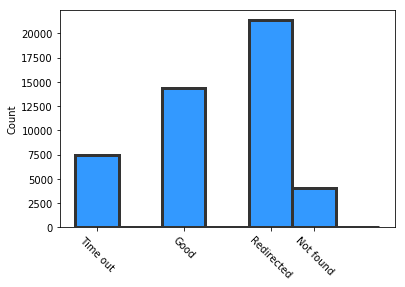

In [7]:
statuses = np.array( links.status )


f, ax = pl.subplots(1, 1)
ax.hist( statuses, np.arange(-1.5,6,1), edgecolor=(0.2,0.2,0.2), lw=3, 
            color=(0.2,0.6,1.0) )


ax.set_ylabel('Count')
ax.set_xticks([-1, 1, 3, 4])
ax.set_xticklabels( ['Time out', 'Good', 'Redirected', 'Not found'], rotation=-45 )

pl.show()

### Filtering out repeated links

To avoid using repeated links, let's create another dataframe.

In [8]:
uniqueLinks = links[ links['flag.uniqueness'] == 0 ]
uniqueLinks = uniqueLinks.drop(columns=['flag.uniqueness'])
uniqueLinks.head()

,type,journal,id,year,link,code,status
0,abstract,Nucleic_Acids_Res,23155066.0,2013,http://www.netlab.uky.edu/p/bioinfo/DiffSplice,200,1
1,abstract,Bioinformatics,27273673.0,2017,http://www.cs.helsinki.fi/u/lmsalmel/LoRMA/,302,3
2,abstract,BMC_Bioinformatics,20492656.0,2010,http://www.cse.univdhaka.edu/~ashis/ppred/inde...,301,3
3,abstract,PLoS_Comput_Biol,28212402.0,2017,https://dongjunchung.github.io/GGPA/,301,3
4,abstract,Bioinformatics,28130230.0,2017,https://github.com/bfosso/MetaShot,301,3


In [9]:
uniqueLinks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36702 entries, 0 to 48391
Data columns (total 7 columns):
type       36702 non-null object
journal    36702 non-null object
id         36536 non-null float64
year       36702 non-null int64
link       36702 non-null object
code       36702 non-null int64
status     36702 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.2+ MB


In [10]:
uniqueLinks.describe()

,id,year,code,status
count,3.653600e+04,36702.000000,36702.000000,36702.000000
mean,2.282358e+07,2012.014332,232.363413,1.849981
std,3.722272e+06,3.483438,120.649623,1.603584
min,1.560816e+07,2005.000000,-1.000000,-1.000000
25%,1.978383e+07,2009.000000,200.000000,1.000000
50%,2.318078e+07,2012.000000,301.000000,3.000000
75%,2.595065e+07,2015.000000,301.000000,3.000000
max,2.916934e+07,2017.000000,999.000000,4.000000


In [11]:
print( 'Percent of repeated links: %.1f%%' % ( (1 - len(uniqueLinks)/len(links))*100. ) )

Percent of repeated links: 22.4%


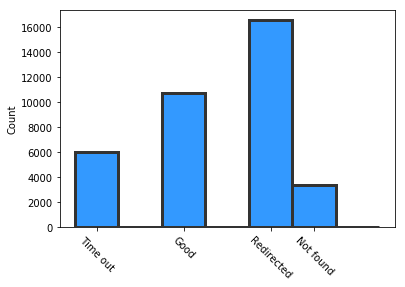

In [12]:
statuses = np.array( uniqueLinks.status )

f, ax = pl.subplots(1, 1)
ax.hist( statuses, np.arange(-1.5,6,1), edgecolor=(0.2,0.2,0.2), lw=3, 
            color=(0.2,0.6,1.0) )


ax.set_ylabel('Count')
ax.set_xticks([-1, 1, 3, 4])
ax.set_xticklabels( ['Time out', 'Good', 'Redirected', 'Not found'], rotation=-45 )

pl.show()

## Number of of links per year

In [13]:
uLinks_year = uniqueLinks.groupby(['year', 'status']).agg('count')

In [14]:
uLinks_year.head(12)

type  journal   id  link  code
year status                                
2005 -1       462      462  461   462   462
      1       318      318  317   318   318
      3       550      550  536   550   550
      4       235      235  233   235   235
2006 -1       442      442  435   442   442
      1       330      330  330   330   330
      3       594      594  588   594   594
      4       216      216  212   216   216
2007 -1       468      468  466   468   468
      1       338      338  333   338   338
      3       605      605  590   605   605
      4       230      230  230   230   230

Grouping by status and retrieving the percent for each status per year.

In [15]:
tseries = {}
for j,status in enumerate([-1, 1, 3, 4]):
    tseries[status] = np.array( uLinks_year.iloc[j::4].link )

Plotting

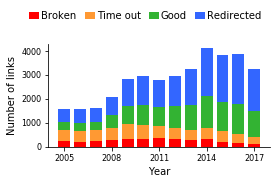

In [16]:
barsize=0.75

f, ax = pl.subplots(1, 1, figsize=(4,2.2) )

b = np.zeros( tseries[status].shape[0] )
years = np.arange(2005,2018,1)

for zlabel,status in enumerate([4,-1,1,3]):
    ax.bar( years, tseries[status] + b, barsize, label=legendStatus[status], 
               color=colors[status], zorder=-1-zlabel )
    b += tseries[status]

simpleaxis(ax)

ax.set_ylabel("Number of links")
ax.set_yticks( np.arange(0,4001,1000) )
ax.set_yticklabels( np.array( np.arange(0,4001,1000), dtype=int ), fontsize=8 )

ax.set_xlabel("Year")
ax.set_xticks( np.arange( 2005,2020,3 ) )
ax.set_xticklabels( np.arange( 2005,2020,3 ), fontsize=8 )

pl.legend(bbox_to_anchor=(1,1.4), frameon=False, ncol=4, 
          handletextpad=0.2, columnspacing=0.8, handlelength=1)

pl.tight_layout()
pl.savefig('Figures/NumLinks per year - all.pdf')

## Percent of links per year

Normalizing the number of links for each year.

In [17]:
tseries_norm = np.zeros( tseries[-1].shape )
for status in [-1, 1, 3, 4]:
    tseries_norm += tseries[status]

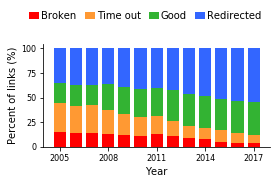

In [18]:
barsize=0.75

f, ax = pl.subplots(1, 1, figsize=(4,2.2) )

b = np.zeros( tseries[status].shape[0] )
years = np.arange(2005,2018,1)

for zlabel,status in enumerate([4,-1,1,3]):
    ax.bar( years, ( tseries[status]/tseries_norm + b )*100., 
               barsize, label=legendStatus[status], 
               color=colors[status], zorder=-1-zlabel )
    b += tseries[status]/tseries_norm

simpleaxis(ax)

ax.set_ylabel("Percent of links (%)")
ax.set_yticks( np.arange(0,101,25) )
ax.set_yticklabels( np.array( np.arange(0,101,25), dtype=int ), fontsize=8 )

ax.set_xlabel("Year")
ax.set_xticks( np.arange( 2005,2020,3 ) )
ax.set_xticklabels( np.arange( 2005,2020,3 ), fontsize=8 )

pl.legend(bbox_to_anchor=(1,1.4), frameon=False, ncol=4, 
          handletextpad=0.2, columnspacing=0.8, handlelength=1)

pl.tight_layout()
pl.savefig('Figures/Percent per year - all.pdf')

## Number of links as function of time

Counting total number per year

Plotting:

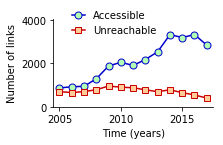

In [19]:
f, ax = pl.subplots( 1, 1, figsize=(3.4, 2.) )

pl.plot( years, tseries[1] + tseries[3], 'o-', 
            markersize=7, label='Accessible', color=colors2['fg_accessb'],
            markeredgecolor=colors2['fg_accessb'], markerfacecolor=colors2['bg_accessb'] )
pl.plot( years, tseries[-1] + tseries[4], 's-', 
            markersize=6, label='Unreachable', color=colors2['fg_unreach'],
            markeredgecolor=colors2['fg_unreach'], markerfacecolor=colors2['bg_unreach'] )

simpleaxis(ax)

pl.ylabel('Number of links')
pl.ylim(0,4050)

pl.xlabel('Time (years)')
pl.xlim(2004.5,2017.5)

pl.legend(bbox_to_anchor=(0.7,1.2), frameon=False, handlelength=1.3)

pl.tight_layout()
pl.savefig('Figures/Total per year - all.pdf')

Ratio between accessible links in 2017 in reference to that in 2005

In [20]:
numAccessible = tseries[1] + tseries[3]

ratio = numAccessible[-1] / numAccessible[0]
print('Ratio: %.2f' % ratio)

avgGrowthRatio = (numAccessible[-1] - numAccessible[0]) / (2017-2005) / numAccessible[0]
print( 'Average growth ratio: %.1f%%' % (avgGrowthRatio*100) )

Ratio: 3.27
Average growth ratio: 18.9%


Ratio between unreachable links in 2017 in reference to that in 2005

In [21]:
numUnreachable = tseries[-1] + tseries[4]

ratio = numUnreachable[-1] / numUnreachable[0]
print('Ratio: %.2f' % ratio)


avgGrowthRatio = (numUnreachable[-1] - numUnreachable[0]) / (2017-2005) / numUnreachable[0]
print( 'Average growth ratio: %.1f%%' % (avgGrowthRatio*100) )

Ratio: 0.58
Average growth ratio: -3.5%


## Number of links per year - abstract only

In [22]:
uniqueLinks_abs = uniqueLinks[ uniqueLinks.type == 'abstract' ]
uniqueLinks_abs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7183 entries, 0 to 7877
Data columns (total 7 columns):
type       7183 non-null object
journal    7183 non-null object
id         7182 non-null float64
year       7183 non-null int64
link       7183 non-null object
code       7183 non-null int64
status     7183 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 448.9+ KB


In [23]:
uLinks_ya = uniqueLinks_abs.groupby(['year', 'status']).agg('count')

tseries_abs = {}
for j,status in enumerate([-1, 1, 3, 4]):
    tseries_abs[status] = np.array( uLinks_ya.iloc[j::4].link )

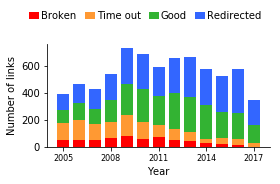

In [24]:
barsize=0.75

f, ax = pl.subplots(1, 1, figsize=(4,2.2) )

b = np.zeros( tseries_abs[status].shape[0] )
years = np.arange(2005,2018,1)

for zlabel,status in enumerate([4,-1,1,3]):
    ax.bar( years, tseries_abs[status] + b, barsize, label=legendStatus[status], 
               color=colors[status], zorder=-1-zlabel )
    b += tseries_abs[status]

simpleaxis(ax)

ax.set_ylabel("Number of links")
#ax.set_yticks( np.arange(0,2001,500) )
#ax.set_yticklabels( np.array( np.arange(0,2001,500), dtype=int ), fontsize=8 )

ax.set_xlabel("Year")
ax.set_xticks( np.arange( 2005,2020,3 ) )
ax.set_xticklabels( np.arange( 2005,2020,3 ), fontsize=8 )

pl.legend(bbox_to_anchor=(1,1.4), frameon=False, ncol=4, 
          handletextpad=0.2, columnspacing=0.8, handlelength=1)

pl.tight_layout()
pl.savefig('Figures/NumLinks per year - Abstract.pdf')

In [25]:
tseries_norm = np.zeros( tseries_abs[-1].shape )
for status in [-1, 1, 3, 4]:
    tseries_norm += tseries_abs[status]

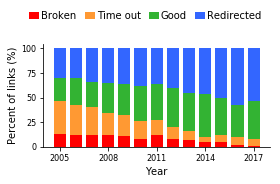

In [26]:
barsize=0.75

f, ax = pl.subplots(1, 1, figsize=(4,2.2) )

b = np.zeros( tseries_abs[status].shape[0] )
years = np.arange(2005,2018,1)

for zlabel,status in enumerate([4,-1,1,3]):
    ax.bar( years, 100*(tseries_abs[status] + b)/tseries_norm, barsize, 
               label=legendStatus[status], 
               color=colors[status], zorder=-1-zlabel )
    b += tseries_abs[status]

simpleaxis(ax)

ax.set_ylabel("Percent of links (%)")
ax.set_yticks( np.arange(0,101,25) )
ax.set_yticklabels( np.array( np.arange(0,101,25), dtype=int ), fontsize=8 )

ax.set_xlabel("Year")
ax.set_xticks( np.arange( 2005,2020,3 ) )
ax.set_xticklabels( np.arange( 2005,2020,3 ), fontsize=8 )

pl.legend(bbox_to_anchor=(1,1.4), frameon=False, ncol=4, 
          handletextpad=0.2, columnspacing=0.8, handlelength=1)

pl.tight_layout()
pl.savefig('Figures/Percent per year - Abstract.pdf')

## Status vs IF of current journal 

List of journals considered in this study:

In [27]:
journals = uniqueLinks.journal.unique()
print( journals )

['Nucleic_Acids_Res' 'Bioinformatics' 'BMC_Bioinformatics'
 'PLoS_Comput_Biol' 'BMC_Genomics' 'BMC_Syst_Biol' 'Nat_Biotechnol'
 'Genome_Biol' 'Nat_Methods' 'Genome_Med']


Impact factors were retrieved from this address: http://admin-apps.webofknowledge.com/JCR/JCR?RQ=HOME

In [28]:
IFdata = pd.read_csv('../../IFs.csv')
IFdata = IFdata.fillna(0)
IFdata

,year,BMC_Genomics,Nucleic_Acids_Res,Bioinformatics,BMC_Bioinformatics,PLoS_Comput_Biol,Genome_Biol,BMC_Syst_Biol,Nat_Biotechnol,Nat_Methods,Genome_Med
0,2016,3.729,10.162,7.307,2.448,4.542,11.908,2.303,41.667,25.062,7.071
1,2015,3.867,9.202,5.766,2.435,4.587,11.313,2.208,43.113,25.328,5.846
2,2014,3.986,9.112,4.981,2.576,4.620,10.810,2.435,41.514,32.072,5.809
3,2013,4.041,8.808,4.621,2.672,4.829,10.465,2.853,39.080,25.953,4.942
4,2012,4.397,8.278,5.323,3.024,4.867,10.288,2.982,32.438,23.565,3.906
5,2011,4.073,8.026,5.468,2.751,5.215,9.036,3.148,23.268,19.276,0.000
6,2010,4.206,7.836,4.877,3.029,5.515,6.885,3.565,31.090,20.721,0.000
7,2009,3.759,7.479,4.926,3.428,5.759,6.626,4.064,29.495,16.874,0.000
8,2008,3.926,6.878,4.328,3.781,5.895,6.153,3.706,22.297,13.651,0.000
9,2007,4.180,6.954,5.039,3.493,6.236,6.589,0.000,22.848,15.478,0.000


In [29]:
count = {}
Z = np.zeros( (10) )
for status in [1,3,-1,4]:
    count[status] = np.zeros( (10) )

def journalID(journalName): 
    if journalName in journals:
        return np.argwhere(journals == journalName)[0][0]
    else: return -1

for index, row in uniqueLinks.iterrows():
    jid = journalID(row.journal)
    if jid != -1:
        count[row['status']][ jid ] += 1
        Z[ jid ] += 1
    

# Normalizing
for status in [1,3,-1,4]:
    count[status] /= Z

In [30]:
IFs = np.array( IFdata.iloc[0] )[1:]
newIDX = np.argsort( IFs )
IFs = IFs[newIDX]

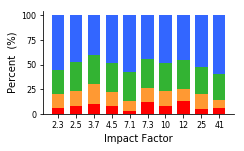

In [31]:
barsize=0.7

f, ax = pl.subplots(1, 1, figsize=(3.5,2.2) )

IFs_x = np.arange(10)

ax.bar( IFs_x, count[4][newIDX], barsize, label='Broken', 
           color=colors[4], zorder=-1 )
b = np.copy( count[4][newIDX] )

ax.bar( IFs_x, b+count[-1][newIDX], barsize, label='Time out', 
           color=colors[-1], zorder=-2 )
b += count[-1][newIDX]

ax.bar( IFs_x, b+count[1][newIDX], barsize, label='Good', 
           color=colors[1], zorder=-3 )
b += count[1][newIDX]

ax.bar( IFs_x, b+count[3][newIDX], barsize, label='Redirect',
           color=colors[3], zorder=-4 )

simpleaxis(ax)

ax.set_ylabel("Percent  (%)")
ax.set_yticks( np.arange(0,1.1,0.25) )
ax.set_yticklabels( np.array( np.arange(0,1.1,0.25)*100, dtype=int ), fontsize=8 )

ax.set_xlabel("Impact Factor")
ax.set_xticks( IFs_x )
ax.set_xticklabels( ['2.3','2.5','3.7','4.5','7.1','7.3','10','12','25','41'], 
                       fontsize=8,  )

pl.tight_layout()
pl.savefig('Figures/Percent per IF.pdf')

## Status vs IF at the time of publication

In [32]:
IFpub = {}
for status in  [1,3,-1,4]:
    IFpub[status] = []

for index, row in uniqueLinks.iterrows():
    year = row.year
    if ( year >= 2003 ) and ( year <= 2017 ) :
        
        # there's no IF for 2017 yet
        if year == 2017: year = 2016
            
        yearIDX = -(year - 2003) + 13
        IF_at_time = IFdata[row.journal].iloc[ yearIDX ]
        IFpub[row.status].append( IF_at_time )

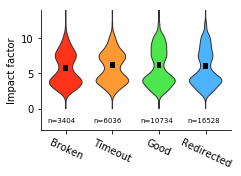

In [33]:
f, ax = pl.subplots( 1, 1, figsize=(3.4, 2.2) )

# let's make sure the order is maintained:
data = [IFpub[4], IFpub[-1], IFpub[1], IFpub[3]]

parts = ax.violinplot( data, [0,1,2,3], showmeans=False, showmedians=False, 
                              showextrema=False, widths=0.7, points=200 )

colors=[(1.0,0.2,0.1),(1.0,0.6,0.2),(0.3,0.9,0.3),(0.3,0.7,1.0)]

j = 0
for pc in parts['bodies']:
    pc.set_facecolor(colors[j])
    pc.set_edgecolor( (0.2,0.2,0.2) )
    pc.set_edgecolors( (0.2,0.2,0.2) )
    pc.set_alpha(1)
    j += 1
    

def buttpos(x): return [x-0.05,x+0.05]
for j in range(4):
    pl.plot(buttpos(j), [np.mean(data[j])]*2, color="k", 
                linewidth=6, solid_capstyle="butt", zorder=4)

for j in range(4):
    ax.text( j-0.4, -2, 'n='+str(len(data[j])), fontsize=7 )

ax.set_ylim(-3,14)
ax.set_ylabel('Impact factor')

ax.set_xlabel('')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels( ['Broken','Timeout','Good','Redirected'], rotation=-25 )

simpleaxis(ax)

pl.savefig('Figures/IF vs status.pdf')

In [34]:
from scipy import stats
f_value, p_value = stats.f_oneway(data[0], data[1], data[3], data[2])
print(f_value, p_value)

9.630003580622287 2.3743960214133033e-06


## Evolution of IF of each category over the years

In [35]:
IFpub = {}
Z = {}
for status in  [1,3,-1,4]:
    IFpub[status] = np.zeros(12)
    Z[status] = np.zeros(12)

for index, row in uniqueLinks.iterrows():
    year = row.year
    if ( year >= 2003 ) and ( year <= 2017 ) :
        
        # there's no IF for 2017 yet
        if year == 2017: year = 2016
            
        yearIDX = year - 2005
        IF_at_time = IFdata[row.journal].iloc[ yearIDX ]
        IFpub[row.status][yearIDX] += IF_at_time
        Z[row.status][yearIDX] += 1

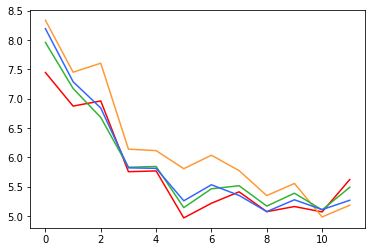

In [36]:
colors = { -1 : (1.0,0.6,0.2), 1 : (0.2,0.7,0.2), 3 : (0.2,0.4,1.0), 4 : (1.0,0.,0.) }
for s in [4,-1,1,3]:
    pl.plot( IFpub[s]/Z[s], color=colors[s] )